In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import xticks
import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

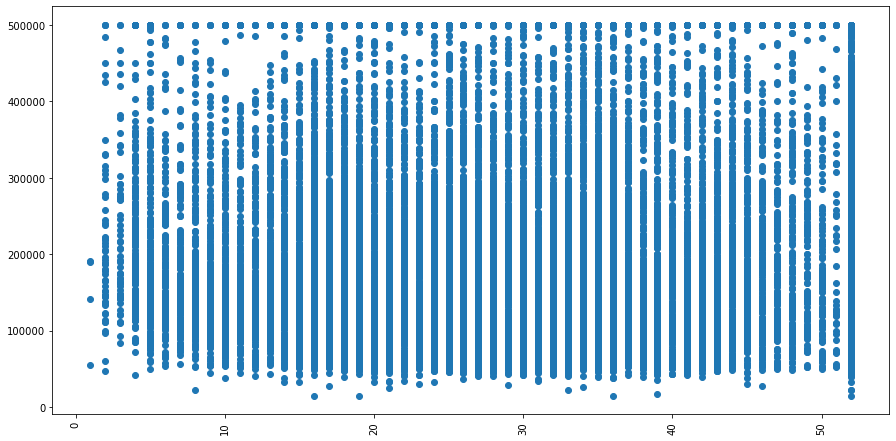

In [22]:
plt.figure(figsize=(15,7.5))
plt.scatter(x = 'housing_median_age' , y = 'median_house_value' ,data=df)
xticks(rotation = 90)
#age has no effect on price

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

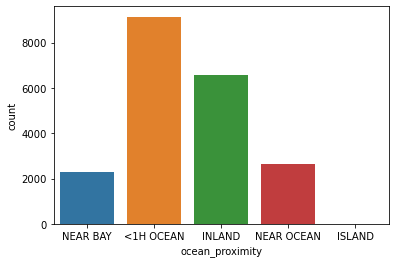

In [23]:
sns.countplot('ocean_proximity' , data = df)

In [24]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

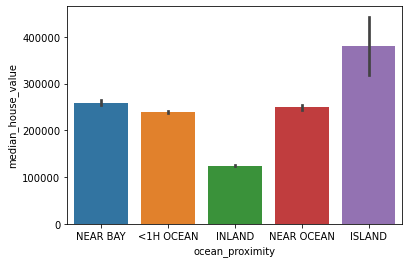

In [25]:
sns.barplot(x = 'ocean_proximity' ,y = 'median_house_value' ,data=df )
#ocean proximity decide the price 

(array([-126., -124., -122., -120., -118., -116., -114., -112.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

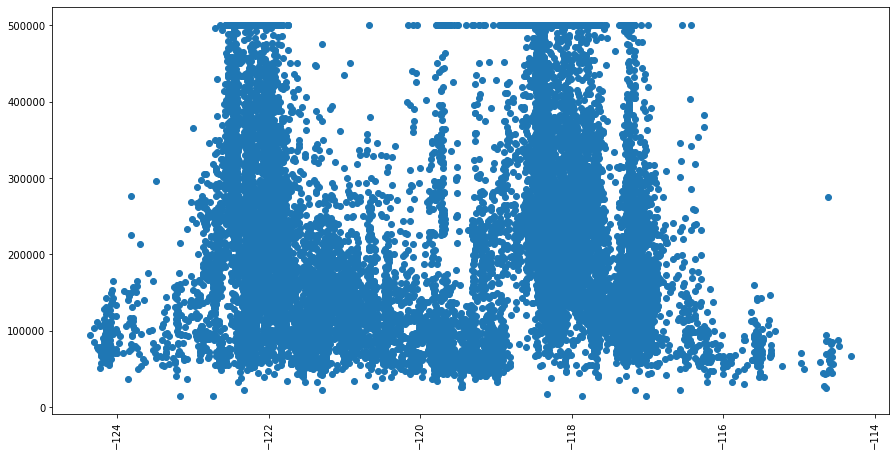

In [31]:
plt.figure(figsize=(15,7.5))
plt.scatter(x = 'longitude' , y = 'median_house_value' ,data=df)
xticks(rotation = 90)
#has effect

In [33]:
meds = df['total_bedrooms'].median()

In [34]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(meds)

In [35]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

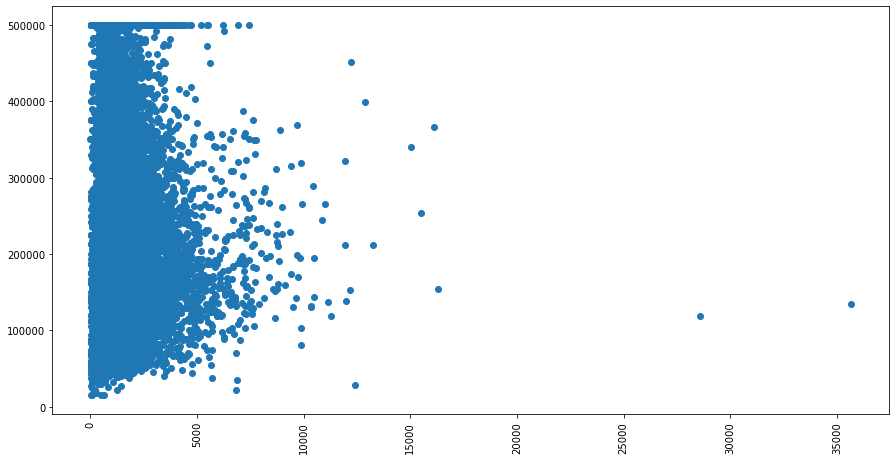

In [37]:
plt.figure(figsize=(15,7.5))
plt.scatter(x = 'population' , y = 'median_house_value' ,data=df)
xticks(rotation = 90)
#has effect

<AxesSubplot:xlabel='population'>

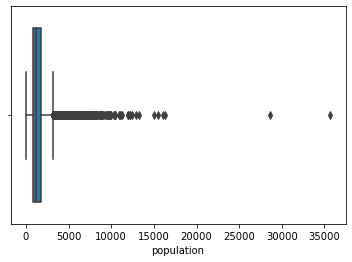

In [38]:
sns.boxplot(df['population'] , data = df)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

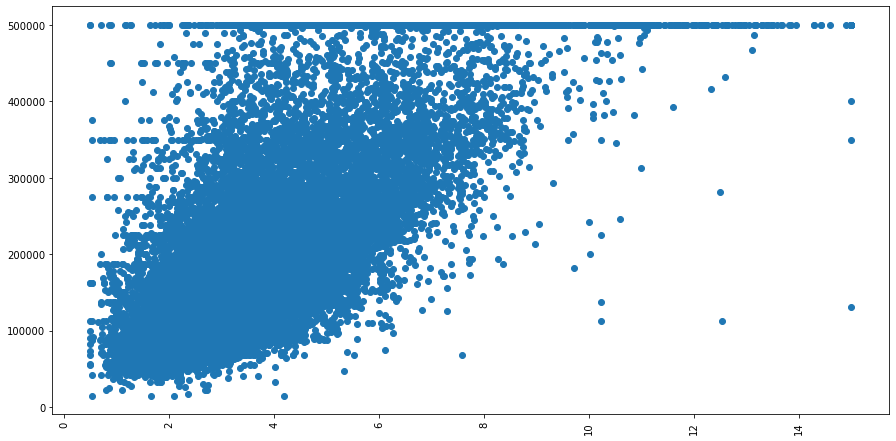

In [39]:
plt.figure(figsize=(15,7.5))
plt.scatter(x = 'median_income' , y = 'median_house_value' ,data=df)
xticks(rotation = 90)
#has effect

<AxesSubplot:xlabel='median_income'>

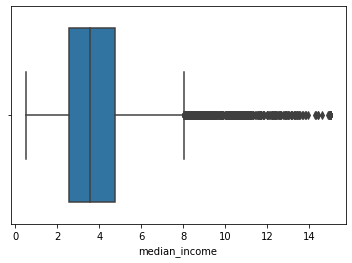

In [40]:
sns.boxplot(df['median_income'] , data = df)

<AxesSubplot:xlabel='households'>

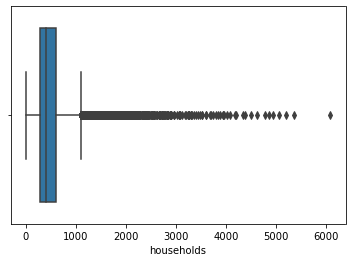

In [41]:
sns.boxplot(df['households'] , data = df)

In [51]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['ocean_proximity'] = label.fit_transform(df['ocean_proximity'])

In [52]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int64
ocena_proximity         int64
dtype: object

In [54]:
df.drop('ocena_proximity' , axis =1 , inplace = True)

In [55]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [56]:
df.shape

(20640, 10)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

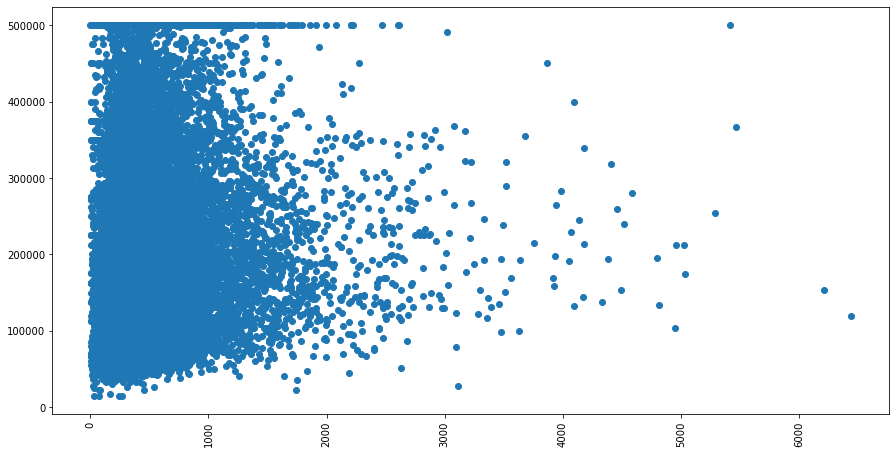

In [60]:
plt.figure(figsize=(15,7.5))
plt.scatter(x = 'total_bedrooms' , y = 'median_house_value' ,data=df)
xticks(rotation = 90)
#has effect

In [61]:
df.drop('housing_median_age' , axis = 1 , inplace =True)

In [62]:
df.skew()

longitude            -0.297801
latitude              0.465953
total_rooms           4.147343
total_bedrooms        3.481141
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
ocean_proximity       1.016286
dtype: float64

In [63]:
df['total_bedrooms'] = np.log(df['total_bedrooms'])
df['total_rooms'] = np.log(df['total_rooms'])
df['households'] = np.log(df['households'])

In [65]:
df['population'] = np.log(df['population'])

In [66]:
df.skew()

longitude            -0.297801
latitude              0.465953
total_rooms          -1.097338
total_bedrooms       -1.073832
population           -1.070786
households           -1.124358
median_income         1.646657
median_house_value    0.977763
ocean_proximity       1.016286
dtype: float64

In [68]:
df.shape

(20640, 9)

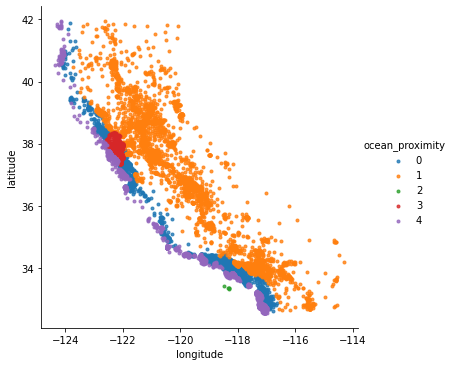

In [106]:
sns.lmplot('longitude', 'latitude', data=df,markers ='.', hue='ocean_proximity', fit_reg=False, height=5)
plt.show()

In [69]:
from scipy.stats import stats

In [70]:
z = np.abs(stats.zscore(df))

print(df.shape)

(20640, 9)


In [72]:
df = df[(z < 3).all(axis=1)]

In [75]:
print(df.shape)

(19900, 9)


In [76]:
df.head()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,6.779922,4.859812,5.774552,4.836282,8.3252,452600.0,3
1,-122.22,37.86,8.867709,7.008505,7.783641,7.037028,8.3014,358500.0,3
2,-122.24,37.85,7.290975,5.247024,6.206576,5.176150,7.2574,352100.0,3
3,-122.25,37.85,7.149917,5.459586,6.324359,5.389072,5.6431,341300.0,3
4,-122.25,37.85,7.394493,5.634790,6.336826,5.556828,3.8462,342200.0,3


<AxesSubplot:>

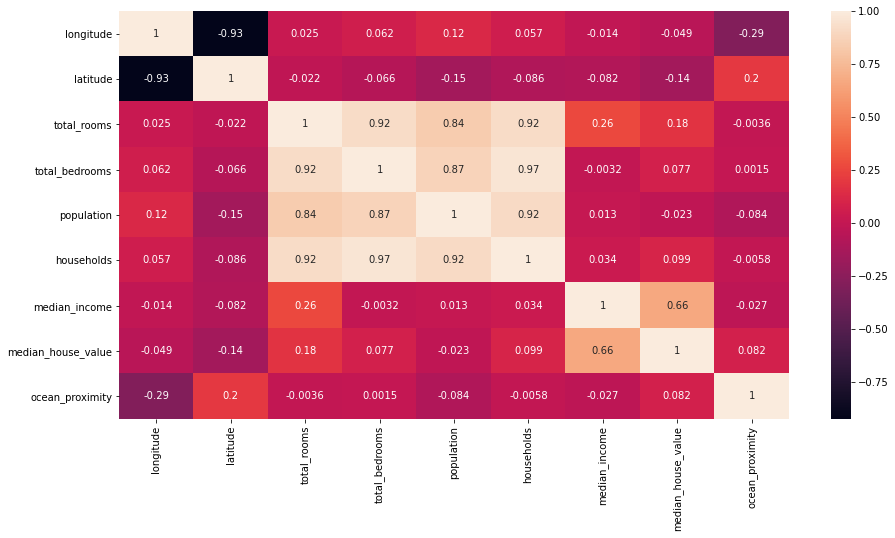

In [94]:
plt.figure(figsize=(15,7.5))
sns.heatmap(df.corr() , annot=True)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [78]:
X = df.drop('median_house_value' , axis = 1)

In [81]:
y = df['median_house_value']

In [82]:
X

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,6.779922,4.859812,5.774552,4.836282,8.3252,3
1,-122.22,37.86,8.867709,7.008505,7.783641,7.037028,8.3014,3
2,-122.24,37.85,7.290975,5.247024,6.206576,5.176150,7.2574,3
3,-122.25,37.85,7.149917,5.459586,6.324359,5.389072,5.6431,3
4,-122.25,37.85,7.394493,5.634790,6.336826,5.556828,3.8462,3
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,7.417580,5.924256,6.739337,5.799093,1.5603,1
20636,-121.21,39.49,6.546785,5.010635,5.874931,4.736198,2.5568,1
20637,-121.22,39.43,7.720462,6.184149,6.914731,6.070738,1.7000,1
20638,-121.32,39.43,7.528332,6.013715,6.608001,5.855072,1.8672,1


In [83]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 19900, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=101)

In [89]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [90]:
y_pred = reg.predict(X_test)

In [91]:
r2_score(y_test,y_pred)

0.643516840329794

In [95]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [99]:
ridge=Ridge()
params = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-2,0,2,5,7,10,20]}
ridge_regressor =GridSearchCV(ridge,params , scoring = 'neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.01, 0, 2, 5,
                                   7, 10, 20]},
             scoring='neg_mean_squared_error')

In [101]:
ridge_regressor.best_params_

{'alpha': 2}

In [102]:
ridge_regressor.best_score_

-4368629078.914442

In [103]:
pred = ridge_regressor.predict(X_test)

In [104]:
r2_score(y_test,pred)

0.6435575663211683

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [115]:
grid.best_score_

0.030751278524278745

In [117]:
truth = grid.predict(X_test)

In [118]:
r2_score(y_test,truth)

0.10170455678292001